In [2]:
## This notebook is about cleaning and exploring the data about smartphones

## The data can be found from Kaggle: 
# https://www.kaggle.com/datasets/informrohit1/smartphones-dataset?resource=download

In [3]:
# Retrieving and opening the data. 

# Importing necessary libraries.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("C:/Users/vartihe/OneDrive - BDO Oy/Documents/archive (1)/smartphones_cleaned_v6.csv")

In [4]:
# Checking what is in the data 

print(data.head())

  brand_name                      model  price  rating  has_5g  has_nfc  \
0    oneplus              OnePlus 11 5G  54999    89.0    True     True   
1    oneplus  OnePlus Nord CE 2 Lite 5G  19989    81.0    True    False   
2    samsung      Samsung Galaxy A14 5G  16499    75.0    True    False   
3   motorola       Motorola Moto G62 5G  14999    81.0    True    False   
4     realme         Realme 10 Pro Plus  24999    82.0    True    False   

   has_ir_blaster processor_brand  num_cores  processor_speed  ...  \
0           False      snapdragon        8.0              3.2  ...   
1           False      snapdragon        8.0              2.2  ...   
2           False          exynos        8.0              2.4  ...   
3           False      snapdragon        8.0              2.2  ...   
4           False       dimensity        8.0              2.6  ...   

   refresh_rate  num_rear_cameras  num_front_cameras       os  \
0           120                 3                1.0  android  

In [5]:
# The data shows different smartphones brands and their models. The columns 
# are information about the phones, and their capabilities.

# The points of interest are the pricing, rating, and operation system (os)


In [6]:
# Check for cleaning needs

print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brand_name                 980 non-null    object 
 1   model                      980 non-null    object 
 2   price                      980 non-null    int64  
 3   rating                     879 non-null    float64
 4   has_5g                     980 non-null    bool   
 5   has_nfc                    980 non-null    bool   
 6   has_ir_blaster             980 non-null    bool   
 7   processor_brand            960 non-null    object 
 8   num_cores                  974 non-null    float64
 9   processor_speed            938 non-null    float64
 10  battery_capacity           969 non-null    float64
 11  fast_charging_available    980 non-null    int64  
 12  fast_charging              769 non-null    float64
 13  ram_capacity               980 non-null    float64

In [7]:
# Everything seems to be in order, all the numerical values are integers or 
# floats, and non-numerical values are objects or booleans.

# However, the price column shows values with no decimal points. Let's 
# check the info more clearly

print(data.describe())

               price      rating   num_cores  processor_speed  \
count     980.000000  879.000000  974.000000       938.000000   
mean    32520.504082   78.258248    7.772074         2.427217   
std     39531.812669    7.402854    0.836845         0.464090   
min      3499.000000   60.000000    4.000000         1.200000   
25%     12999.000000   74.000000    8.000000         2.050000   
50%     19994.500000   80.000000    8.000000         2.300000   
75%     35491.500000   84.000000    8.000000         2.840000   
max    650000.000000   89.000000    8.000000         3.220000   

       battery_capacity  fast_charging_available  fast_charging  ram_capacity  \
count        969.000000               980.000000     769.000000    980.000000   
mean        4817.748194                 0.854082      46.126138      6.560204   
std         1009.540054                 0.353205      34.277870      2.744378   
min         1821.000000                 0.000000      10.000000      1.000000   
25%      

In [8]:
# The price column in showing odd values. For example, the minimum value is 3499, 
# when the actual value is 34.99$. Let's convert the value for more suitable form.

data['price'] = data['price'] / 100.0

In [9]:
print(data.head())

  brand_name                      model   price  rating  has_5g  has_nfc  \
0    oneplus              OnePlus 11 5G  549.99    89.0    True     True   
1    oneplus  OnePlus Nord CE 2 Lite 5G  199.89    81.0    True    False   
2    samsung      Samsung Galaxy A14 5G  164.99    75.0    True    False   
3   motorola       Motorola Moto G62 5G  149.99    81.0    True    False   
4     realme         Realme 10 Pro Plus  249.99    82.0    True    False   

   has_ir_blaster processor_brand  num_cores  processor_speed  ...  \
0           False      snapdragon        8.0              3.2  ...   
1           False      snapdragon        8.0              2.2  ...   
2           False          exynos        8.0              2.4  ...   
3           False      snapdragon        8.0              2.2  ...   
4           False       dimensity        8.0              2.6  ...   

   refresh_rate  num_rear_cameras  num_front_cameras       os  \
0           120                 3                1.0  and

<Axes: xlabel='price', ylabel='Count'>

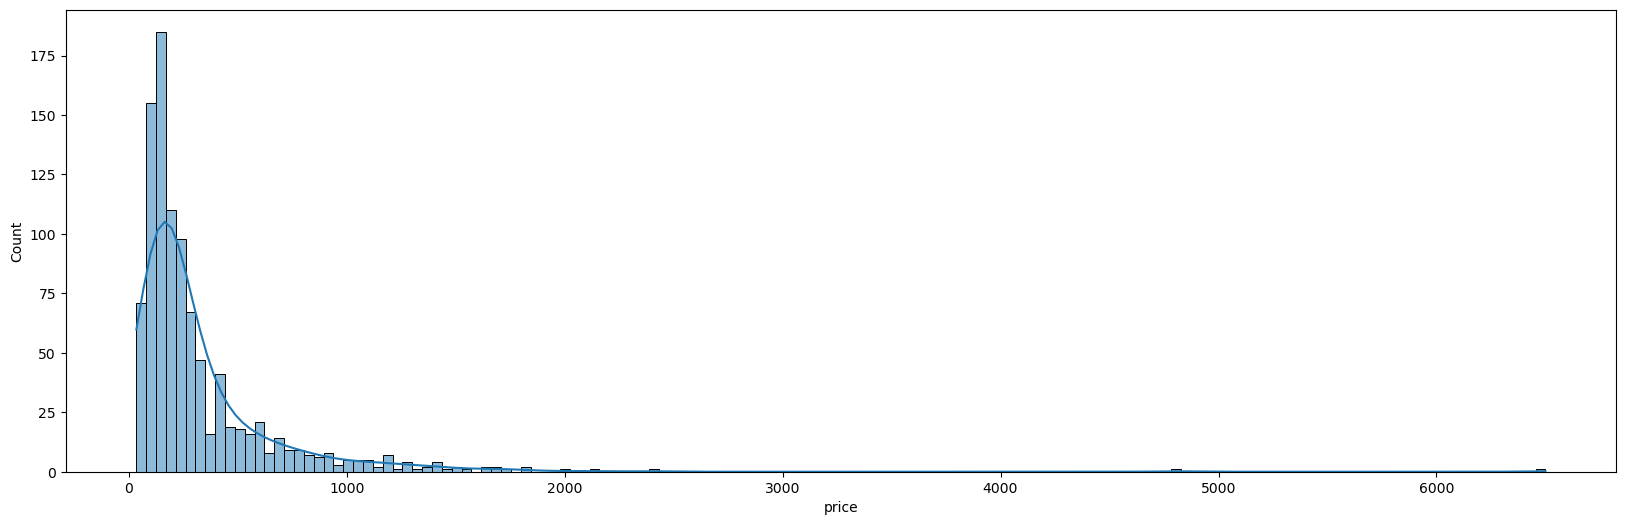

In [10]:
# Let's see the price distribution, and format the table for better reading.

plt.figure(figsize=(20, 6))
sns.histplot(data['price'], kde=True)

<Axes: xlabel='price', ylabel='Count'>

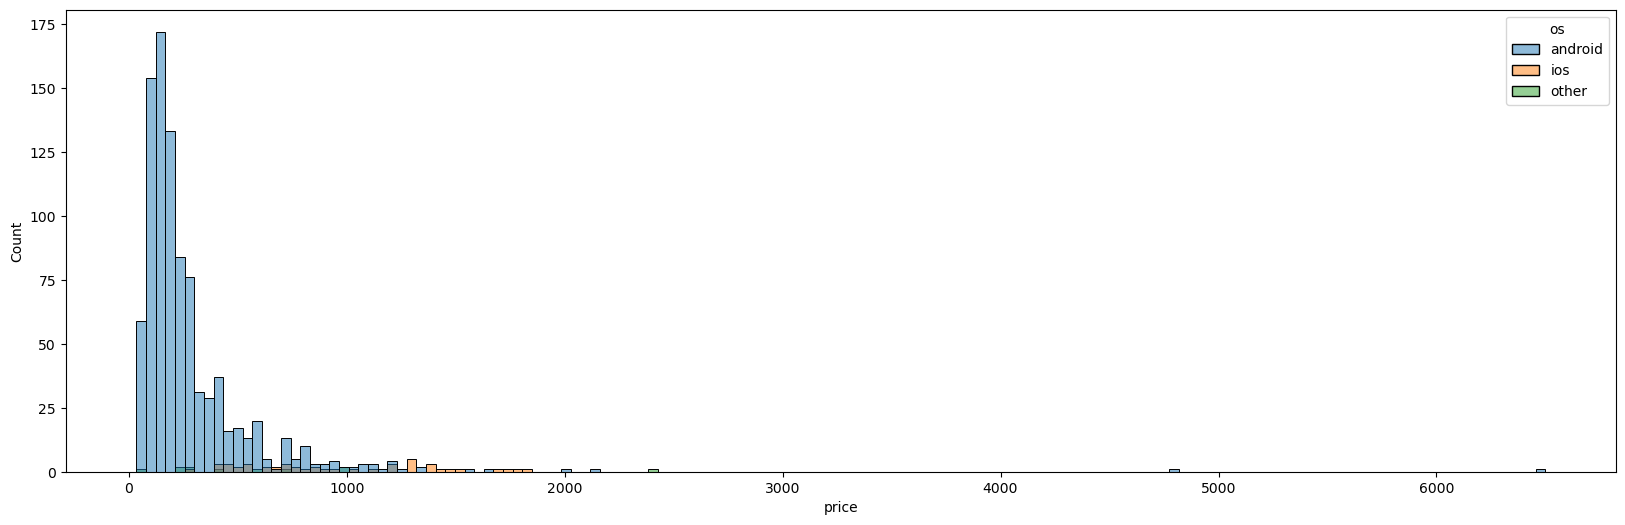

In [11]:
# The histogram shows that there are most phones under the pricerange or 500$.

# Next, we bring the operating system and see, how the operating system are 
# affecting to the price.

plt.figure(figsize=(20, 6))
sns.histplot(data=data, x='price', hue='os')

In [12]:
# The histogram shows that most of the androids are below 1000$, and the 
# ios are scattered on both sides, slightly leaning heavy over 1000$.

<Axes: xlabel='price', ylabel='rating'>

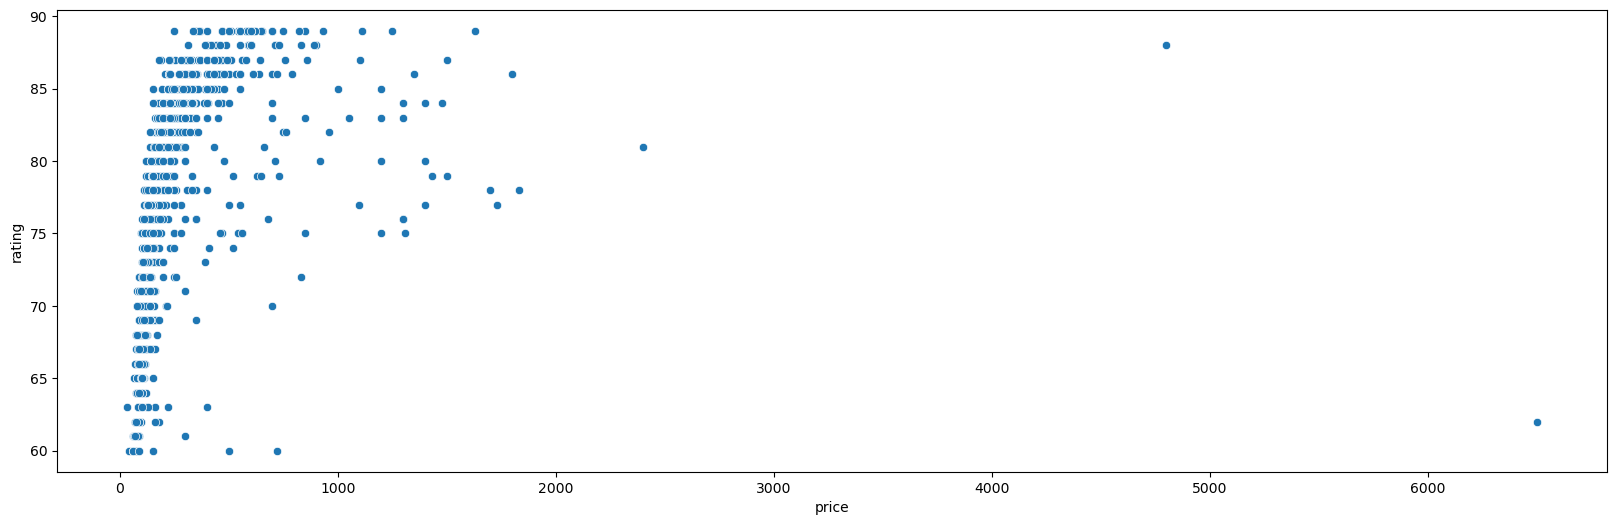

In [13]:
# The price vs. rating correlation can be seen from scatterplot. 

plt.figure(figsize=(20, 6))
sns.scatterplot(x='price', y='rating', data=data)

<Axes: xlabel='price', ylabel='rating'>

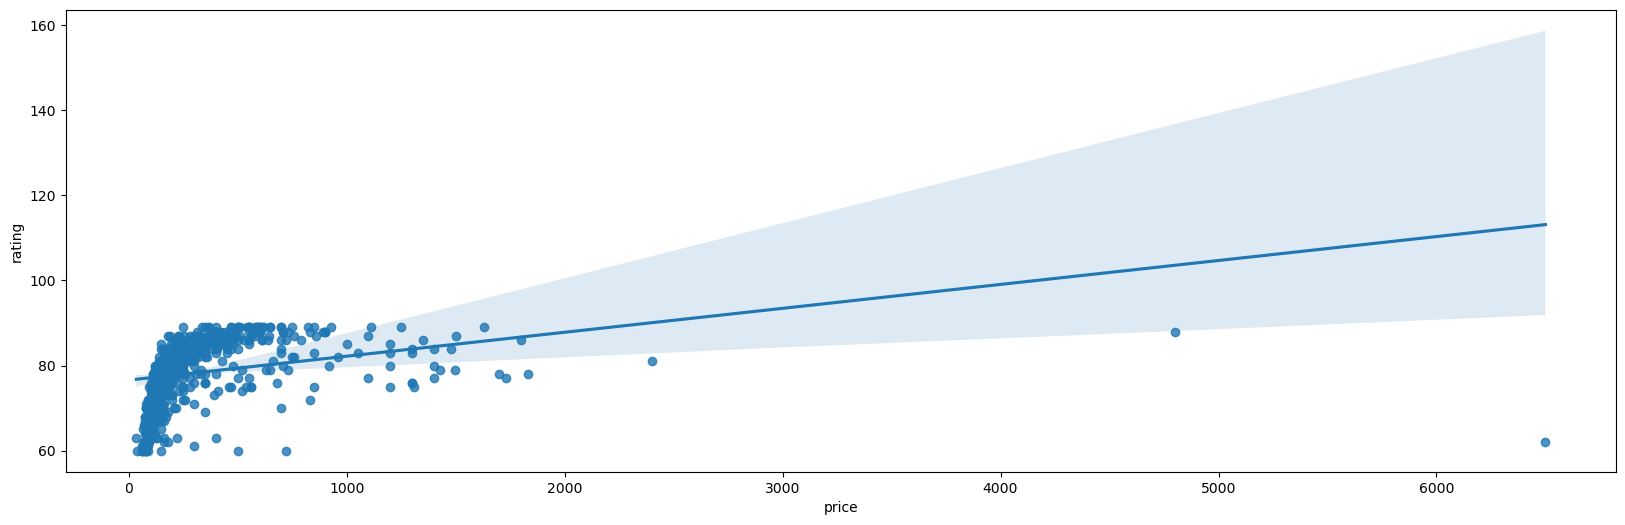

In [14]:
# Adding a regression line for visualization

plt.figure(figsize=(20, 6))
sns.regplot(x=data['price'], y=data['rating'])

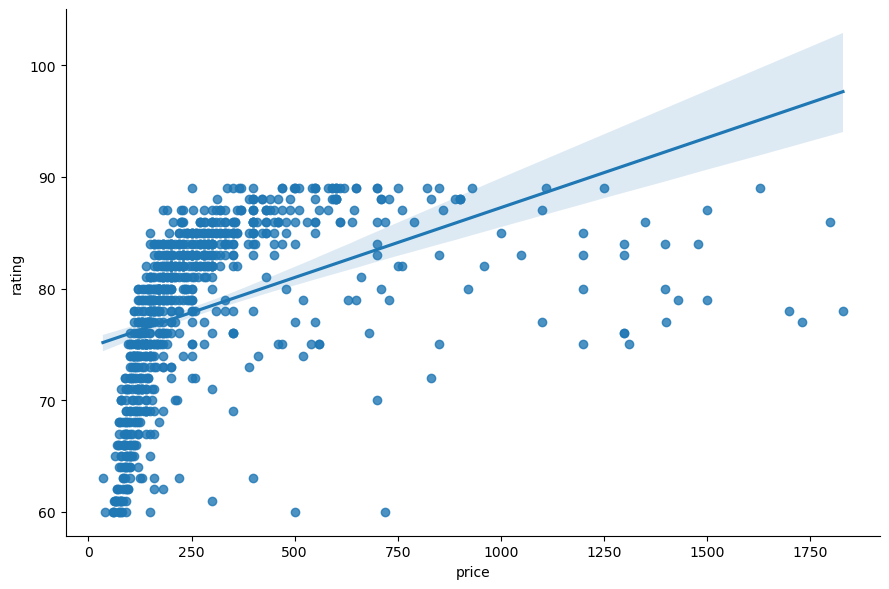

In [15]:
# The data has values that are not valuable information. We can see that 
# there are three phones over 2000$, and their rating is not premium, 
# therefore we can filter them out, and try again with altered data and grid. 

data_2=data[data['price'] <= 2000]

sns.lmplot(x='price', y='rating', data=data_2, height=6, aspect=1.5)

<Axes: xlabel='brand_name'>

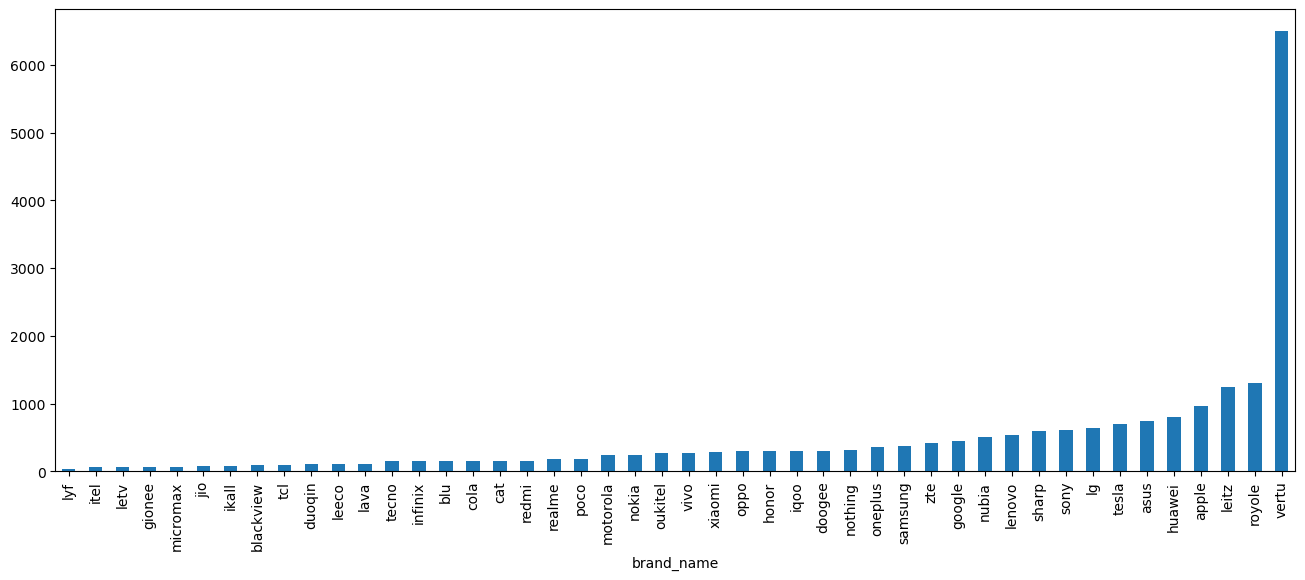

In [16]:
# There is a positive correlation with higher prices and higher ratings.

# The average price(mean) can be grouped by the brand. 

avg_price = data.groupby('brand_name')['price'].mean().sort_values()
avg_price.plot(kind='bar', figsize=(16, 6))

In [17]:
# The top five expensive brands are huawei, apple, leitz, royole, and vertu. 
# The least expensive are lyf, itel, letv, gionee, and micromax. 
# For Finnish point of view, nokia is in the middle. 


C:\Users\vartihe\AppData\Local\Temp\ipykernel_11416\2865204823.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


<Axes: >

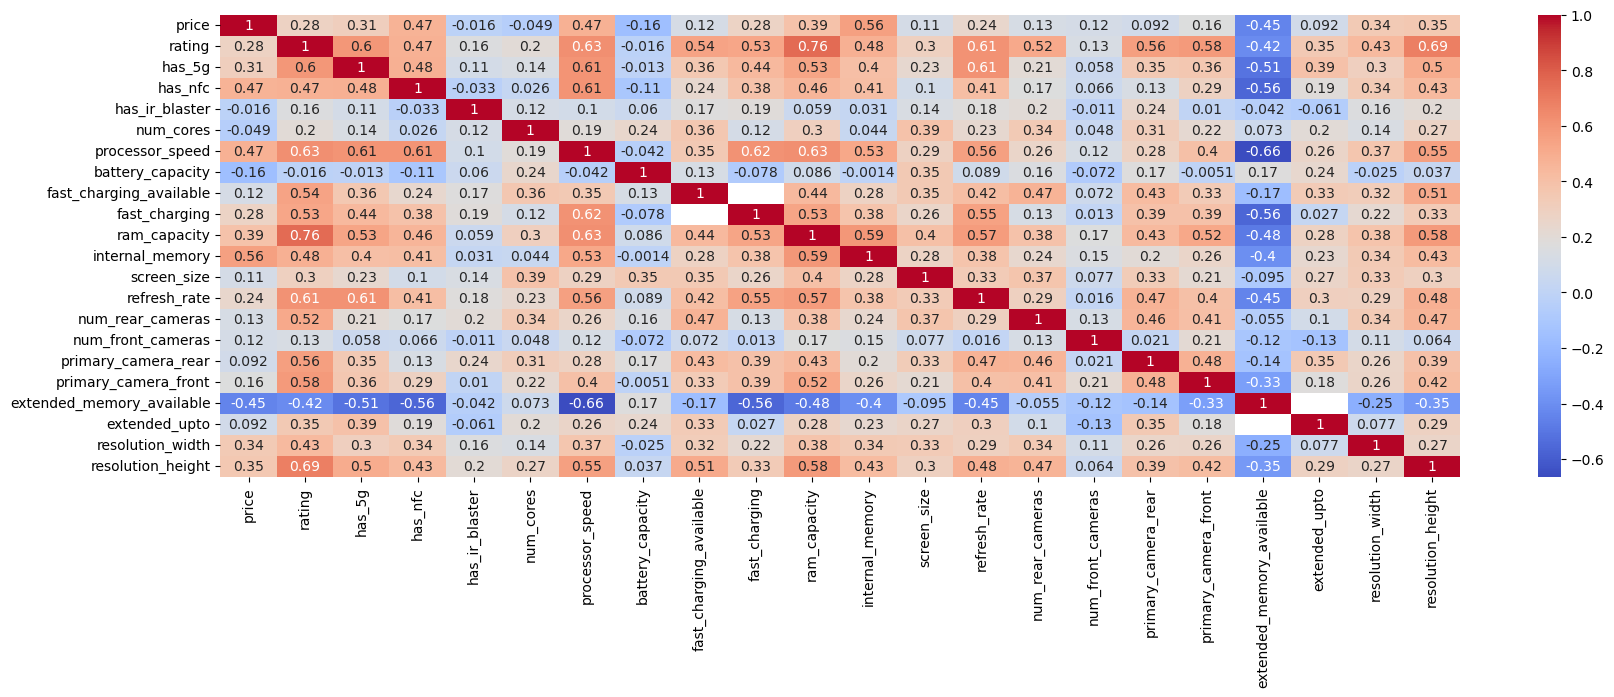

In [18]:
# The heatmap can give correlations between each numerical aspects. 

corr = data.corr()
plt.figure(figsize=(20, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [19]:
# There are highest positive correlations for price with internal memory, and 
# processor speed. The highest negative correlation for the price is the 
# availability of extended memory and battery capacity. 

# The ratings are high for those phones that have high ram capacity, 
# and high height resolution. 

In [20]:
### Key findings:

## Most of the phones are under the pricerange or 500$. Androids are below 
# 1000$, and the ios are scattered on both sides, slightly leaning heavy over 
# 1000$.

## There is a positive correlation with higher prices and higher ratings.

## The ratings tend to be higher for those phones that have high ram capacity, and 
# high height resolution.

## There are high positive correlations for price with internal memory, and processor 
# speed. That means, the higher memoty or speed, the higher the price. 

## Highest negative correlation is between extended memory available and processor 
# speed. That means, the more extended memory there is available, the less processor 
# speed the phones has.